In [347]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import trapz
from scipy.linalg import expm
sns.set_context("notebook")
import warnings
warnings.filterwarnings("ignore", message="elementwise comparison failed; returning scalar instead")
Matriz_A = pd.read_excel('Datos.xlsx',sheet_name='Matriz_A')
Xij = pd.read_excel('Datos.xlsx',sheet_name='x(j)')
Identidad= pd.DataFrame(np.identity(3))
Parametros = pd.read_excel('Datos.xlsx',sheet_name='Parametros')

delta=1
kfinal=260
m=[]



In [348]:
# Calcular la matriz de probabilidades de transición
#matriz_probabilidades = expm(Matriz_A)
Matriz_A_Delta = Matriz_A
Matriz_A_Delta

,0,1,2
0,0.974705,0.024423,0.000872
1,0.052030,0.907858,0.040111
2,0.000761,0.010660,0.988579


In [349]:
Xij

,0,1,2
0,0,27.308613,34.230463


In [350]:
Parametros

,beta,eta,w
0,4.3,182,0.09


In [351]:
def funcion_producto(delta,k,beta,eta,w,x):
        return np.exp(((delta/eta)**beta)*(np.exp(w*x)))**((k**beta)-(k+1)**beta)


In [352]:
for k in [0, 50, 100]:
    M = [i for i in range(k + 10, kfinal, 10)]
    M1 = [i for i in range(k, kfinal, 10)]
   
    Lista_final = []
    for m_iter in M:
        m = m_iter
        Lista_resultados = []
        for k_iter in range(k, m):
            dic_resultado = {}
            for X_estado in Xij.columns:
                X_est = Xij[X_estado]
                resultado = funcion_producto(delta, k_iter, Parametros.beta, Parametros.eta, Parametros.w, X_est)
                dic_resultado[X_estado] = float(resultado)
            Lista_resultados.append(dic_resultado)


        Tabla_covariables = pd.DataFrame.from_records(Lista_resultados, index=range(k, m))
        matriz_t_1 = ""
        dict_resultados = {}
        for k_iter in Tabla_covariables.index:
            fila = Tabla_covariables.loc[k_iter]
            matriz_diag = np.diag(fila)
            L_i = np.dot(matriz_diag, Matriz_A_Delta)
            if matriz_t_1 == "":
                matriz_t_1 = L_i
            else:
                mult_matrices = np.dot(matriz_t_1, L_i)
                matriz_t_1 = mult_matrices
            dict_resultados[k_iter] = matriz_t_1

        ult_mat = matriz_t_1.sum(axis=1)
        Final = pd.DataFrame(ult_mat, columns=[m])
        Lista_final.append(Final)
    
    globals()['df_{}'.format(k)] = pd.concat(Lista_final, axis=1)



C:\Users\jimmy\AppData\Local\Temp\ipykernel_18632\1393532930.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dic_resultado[X_estado] = float(resultado)


In [353]:
Tabla_covariables

,0,1,2
100,0.996676,0.961867,0.930076
101,0.996566,0.960625,0.927839
102,0.996454,0.959357,0.925557
103,0.996338,0.958062,0.923229
104,0.996220,0.956740,0.920855
...,...,...,...
245,0.938534,0.476707,0.251256
246,0.937731,0.471961,0.246612
247,0.936920,0.467219,0.242012
248,0.936103,0.462481,0.237456


In [354]:
X_estado

2

In [355]:
df_list = [df_0, df_50, df_100]

In [356]:
df_0.T

,0,1,2
10,0.999988,0.999951,0.999920
20,0.999664,0.999163,0.998501
30,0.997544,0.995184,0.991817
40,0.990031,0.983196,0.973147
50,0.971009,0.956084,0.933844
60,0.932529,0.905753,0.865590
70,0.867234,0.826167,0.764360
80,0.772480,0.717661,0.635006
90,0.654236,0.590035,0.493134
100,0.527085,0.460714,0.360479


In [357]:
M_list = [[i for i in range(0, kfinal, 10)], [i for i in range(50, kfinal, 10)], [i for i in range(100, kfinal, 10)]]

In [358]:
df_T_list = []

for i in range(len(df_list)):
    df_T = df_list[i].T
    df_T.loc[-1] = [1] * df_T.shape[1]
    df_T = df_T.sort_index().reset_index(drop=True)
    df_T.index = M_list[i]
    df_T_list.append(df_T)

df_0_T = df_T_list[0]
df_50_T = df_T_list[1]
df_100_T = df_T_list[2]

In [359]:
df_0_T

,0,1,2
0,1.000000,1.000000,1.000000
10,0.999988,0.999951,0.999920
20,0.999664,0.999163,0.998501
30,0.997544,0.995184,0.991817
40,0.990031,0.983196,0.973147
50,0.971009,0.956084,0.933844
60,0.932529,0.905753,0.865590
70,0.867234,0.826167,0.764360
80,0.772480,0.717661,0.635006
90,0.654236,0.590035,0.493134


In [360]:

dfs = [df_0_T, df_50_T, df_100_T]  # lista de dataframes a procesar
RUL = pd.DataFrame()  # dataframe vacío para almacenar resultados

for i, df in enumerate(dfs):
    integrals = df.apply(lambda col: trapz(col, df.index))
    new_col_name = f'RUL {i}'  # nombre de la nueva columna a agregar
    new_col = pd.DataFrame(integrals, columns=[new_col_name]).astype(int)
    RUL = pd.concat([RUL, new_col], axis=1)

RUL = RUL.rename_axis(columns='Estado')





In [388]:


RUL

Estado,RUL 0,RUL 1,RUL 2
0,106,68,42
1,101,56,25
2,93,40,12


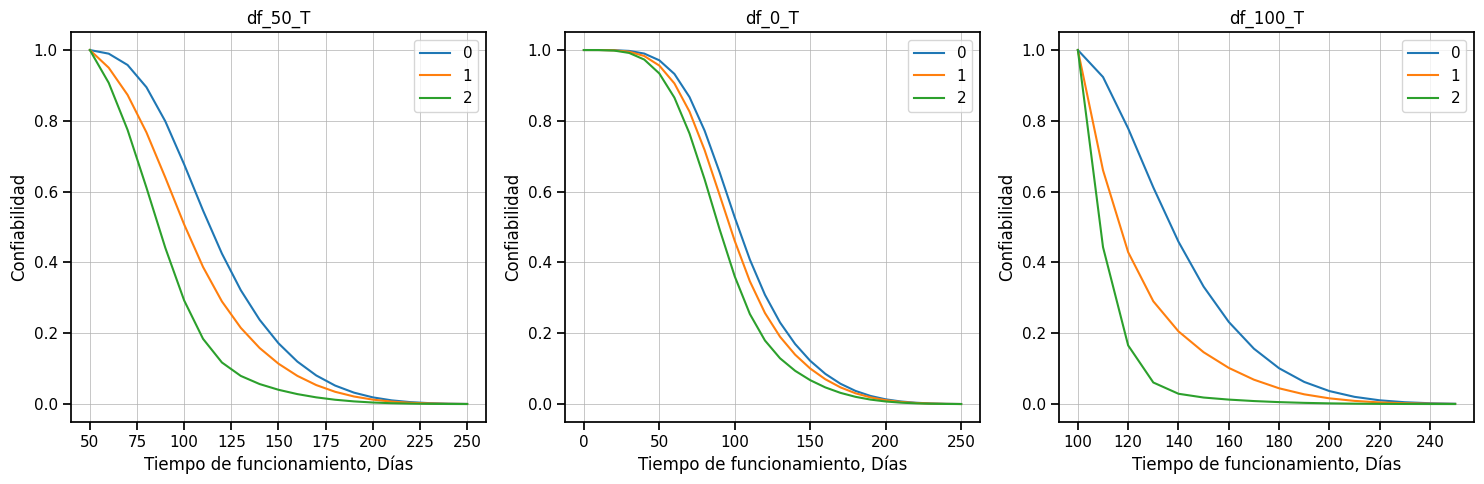

In [373]:
import matplotlib.pyplot as plt

# Crear una figura con tres subtramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))



# Gráfico para df_0_T
df_0_T.plot(ax=axes[1])
axes[1].set_xlabel('Tiempo de funcionamiento, Días')
axes[1].set_ylabel('Confiabilidad')
axes[1].grid(visible=True, lw=0.5)
axes[1].set_title('df_0_T')

# Gráfico para df_50_T
df_50_T.plot(ax=axes[0])
axes[0].set_xlabel('Tiempo de funcionamiento, Días')
axes[0].set_ylabel('Confiabilidad')
axes[0].grid(visible=True, lw=0.5)
axes[0].set_title('df_50_T')

# Gráfico para df_100_T
df_100_T.plot(ax=axes[2])
axes[2].set_xlabel('Tiempo de funcionamiento, Días')
axes[2].set_ylabel('Confiabilidad')
axes[2].grid(visible=True, lw=0.5)
axes[2].set_title('df_100_T')

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura con los tres gráficos
plt.show()


<Figure size 500x500 with 0 Axes>

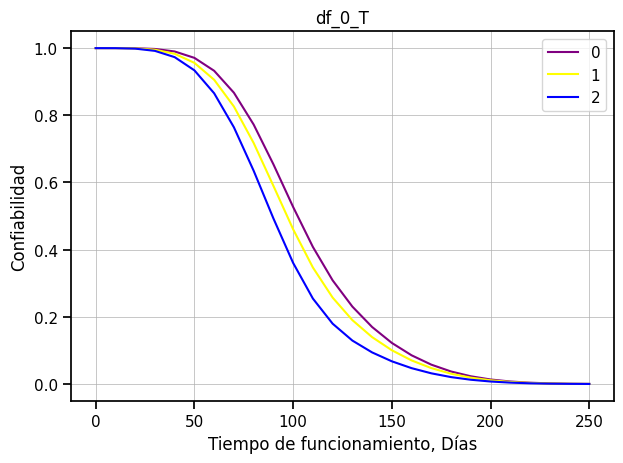

In [377]:
import matplotlib.pyplot as plt

# Gráfico para df_0_T
plt.figure(figsize=(5, 5))
df_0_T.plot(color=['purple', 'yellow', 'blue'], label=['Curva 1', 'Curva 2', 'Curva 3'])
plt.xlabel('Tiempo de funcionamiento, Días')
plt.ylabel('Confiabilidad')
plt.grid(visible=True, lw=0.5)
plt.title('df_0_T')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

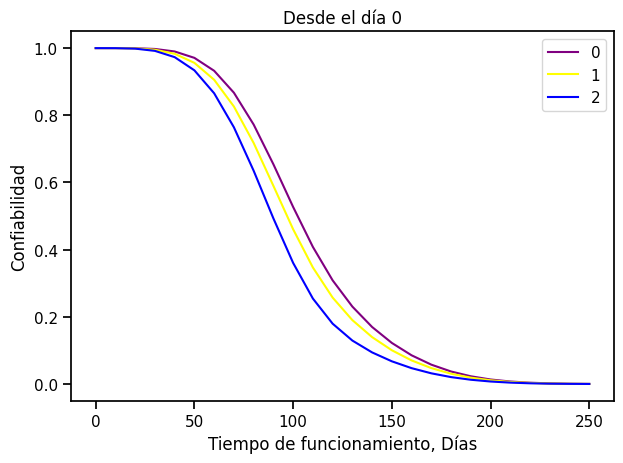

<Figure size 500x500 with 0 Axes>

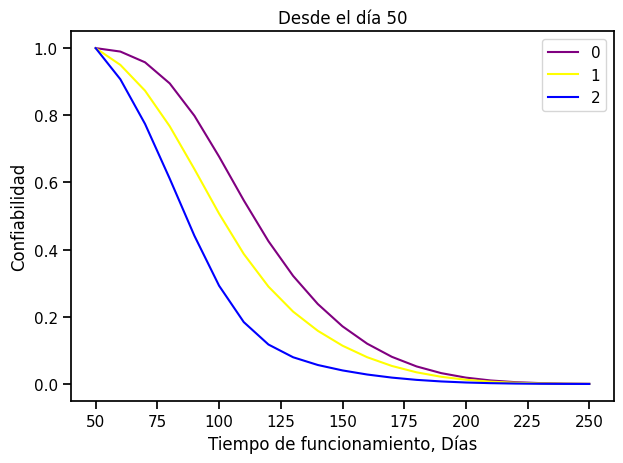

<Figure size 500x500 with 0 Axes>

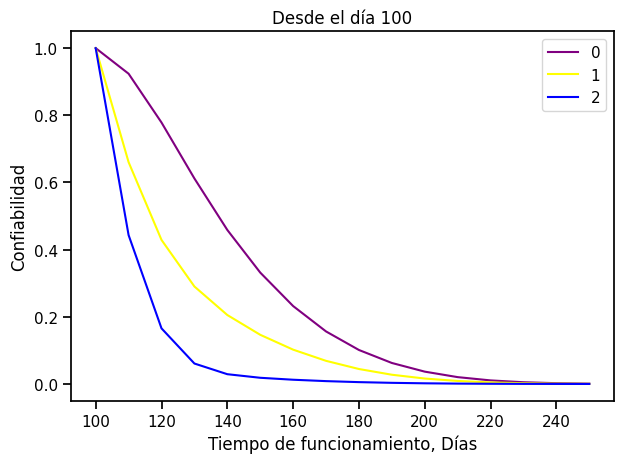

In [380]:
import matplotlib.pyplot as plt


# Gráfico para df_0_T
plt.figure(figsize=(5, 5))
df_0_T.plot(color=['purple', 'yellow', 'blue'], label=['Curva 1', 'Curva 2', 'Curva 3'])
plt.xlabel('Tiempo de funcionamiento, Días')
plt.ylabel('Confiabilidad')
plt.title('Desde el día 0')
plt.legend()
plt.tight_layout()
plt.show()


# Gráfico para df_50_T
plt.figure(figsize=(5, 5))
df_50_T.plot(color=['purple', 'yellow', 'blue'], label=['Curva 1', 'Curva 2', 'Curva 3'])
plt.xlabel('Tiempo de funcionamiento, Días')
plt.ylabel('Confiabilidad')
plt.title('Desde el día 50')
plt.tight_layout()
plt.show()

# Gráfico para df_100_T
plt.figure(figsize=(5, 5))
df_100_T.plot(color=['purple', 'yellow', 'blue'], label=['Curva 1', 'Curva 2', 'Curva 3'])
plt.xlabel('Tiempo de funcionamiento, Días')
plt.ylabel('Confiabilidad')
plt.title('Desde el día 100')
plt.tight_layout()
plt.show()


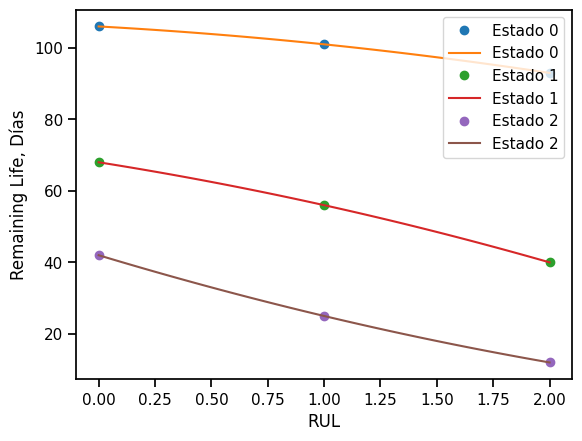

In [387]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Puntos de la curva original
x = RUL.T.columns
y = RUL.T.values.tolist()

# Interpolación polinómica de Lagrange para cada conjunto de puntos
x_interp = np.linspace(min(x), max(x), 100)
y_interp = []
for i in range(len(y)):
    polynomial = np.poly1d(np.polyfit(x, y[i], deg=len(x)-1))
    y_interp.append(polynomial(x_interp))

# Graficar la curva interpolada
for i in range(len(y)):
    plt.plot(x, y[i], 'o', label=f'Estado {i}')
    plt.plot(x_interp, y_interp[i], label=f'Estado {i}')
plt.xlabel('RUL')
plt.ylabel('Remaining Life, Días')
plt.legend()
plt.show()


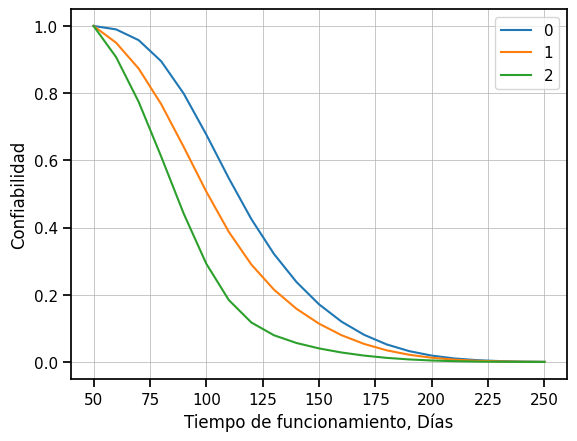

In [364]:


df_50_T.plot()
plt.xlabel('Tiempo de funcionamiento, Días')
plt.ylabel('Confiabilidad')
plt.grid(visible=True, lw=0.5)

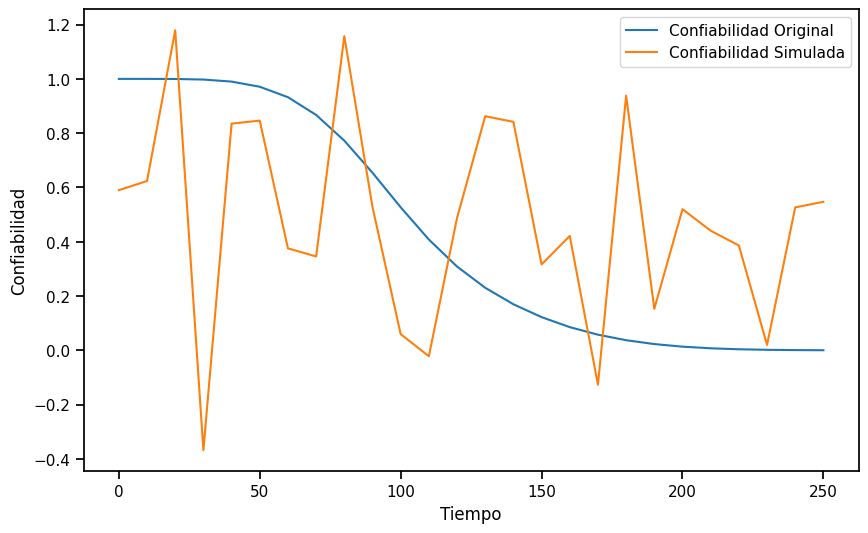

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Obtener los valores de confiabilidad para el estado 0 del dataframe
valores_confiabilidad = df_0_T.iloc[:, 0]

# Ajustar una distribución normal a los datos de confiabilidad
media, desviacion = norm.fit(valores_confiabilidad)

# Generar muestras aleatorias utilizando la distribución normal ajustada
num_muestras = len(df_0_T)
muestras_aleatorias = np.random.normal(media, desviacion, size=num_muestras)

# Crear un dataframe simulado con las muestras aleatorias
df_simulado = pd.DataFrame({'Tiempo': df_0_T.index, 'Confiabilidad Simulada': muestras_aleatorias})

# Graficar la curva simulada y la curva original
plt.figure(figsize=(10, 6))
plt.plot(df_0_T.index, df_0_T.iloc[:, 0], label='Confiabilidad Original')
plt.plot(df_simulado['Tiempo'], df_simulado['Confiabilidad Simulada'], label='Confiabilidad Simulada')

plt.xlabel('Tiempo')
plt.ylabel('Confiabilidad')
plt.legend()
plt.show()


In [366]:
valores_confiabilidad

0      1.000000
10     0.999988
20     0.999664
30     0.997544
40     0.990031
50     0.971009
60     0.932529
70     0.867234
80     0.772480
90     0.654236
100    0.527085
110    0.408164
120    0.308687
130    0.230484
140    0.169744
150    0.122290
160    0.085478
170    0.057621
180    0.037278
190    0.023036
200    0.013528
210    0.007509
220    0.003916
230    0.001907
240    0.000861
250    0.000358
Name: 0, dtype: float64

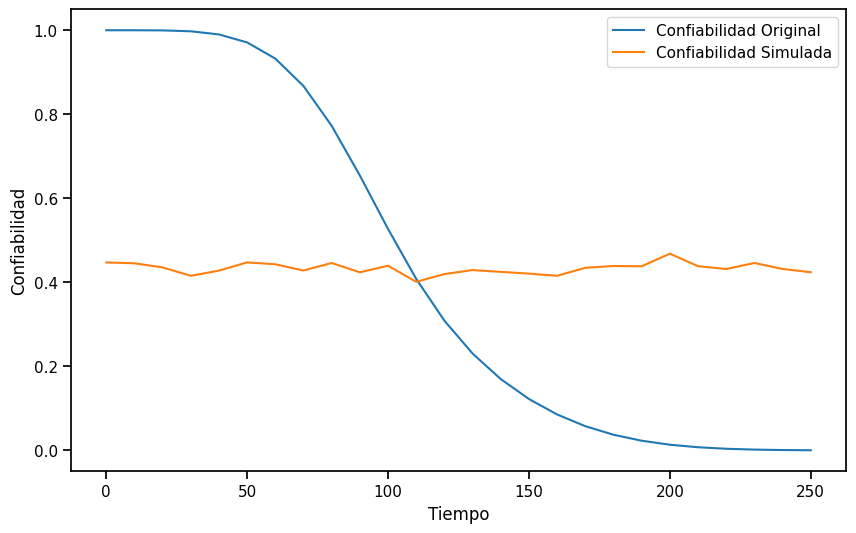

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener los valores de confiabilidad para el estado 0 del dataframe
valores_confiabilidad = df_0_T.iloc[:, 0].values

# Generar muestras aleatorias utilizando remuestreo con reemplazo
num_muestras = 1000
indices_aleatorios = np.random.choice(len(valores_confiabilidad), size=(num_muestras, len(df_0_T)))
muestras_aleatorias = valores_confiabilidad[indices_aleatorios.T]

# Calcular la propagación del error (por ejemplo, promedio de las muestras) para cada punto de tiempo
confiabilidad_simulada = np.mean(muestras_aleatorias, axis=1)

# Crear un dataframe simulado con la confiabilidad simulada
df_simulado = pd.DataFrame({'Tiempo': df_0_T.index, 'Confiabilidad Simulada': confiabilidad_simulada})

# Graficar la curva simulada y la curva original
plt.figure(figsize=(10, 6))
plt.plot(df_0_T.index, df_0_T.iloc[:, 0], label='Confiabilidad Original')
plt.plot(df_simulado['Tiempo'], df_simulado['Confiabilidad Simulada'], label='Confiabilidad Simulada')

plt.xlabel('Tiempo')
plt.ylabel('Confiabilidad')
plt.legend()
plt.show()

